In [ ]:
import pandas as pd
import numpy as np


In [63]:

account=pd.read_csv("/content/account.csv", delimiter=";")
card=pd.read_csv("/content/card.csv", delimiter=";")
loan=pd.read_csv("/content/loan.csv", delimiter=";")
client=pd.read_csv("/content/client.csv", delimiter=";")
disp=pd.read_csv("/content/disp.csv", delimiter=";")
district=pd.read_csv("/content/district.csv", delimiter=";")
order=pd.read_csv("/content/order.csv", delimiter=";")
trans=pd.read_csv("/content/trans.csv", delimiter=";")

In [84]:

tables = {
    "account": account.columns.tolist(),
    "card": card.columns.tolist(),
    "loan": loan.columns.tolist(),
    "client": client.columns.tolist(),
    "disp": disp.columns.tolist(),
    "district": district.columns.tolist(),
    "order": order.columns.tolist(),
    "trans": trans.columns.tolist(),
}

for table_name, columns in tables.items():
    print(f"{table_name} columns:")
    print(columns)
    print()


account columns:
['account_id', 'district_id', 'frequency', 'date']

card columns:
['card_id', 'disp_id', 'type', 'issued']

loan columns:
['loan_id', 'account_id', 'date', 'amount', 'duration', 'payments', 'status']

client columns:
['client_id', 'birth_number', 'district_id']

disp columns:
['disp_id', 'client_id', 'account_id', 'type']

district columns:
['A1', 'district', 'region_name', 'A4']

order columns:
['order_id', 'account_id', 'bank_to', 'account_to', 'amount', 'k_symbol']

trans columns:
['trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account']



In [70]:

district.drop(district.columns[4:16], axis=1, inplace=True)


In [71]:
district.columns

Index(['A1', 'A2', 'A3', 'A4'], dtype='object')

In [75]:
#name changing from a2,a3
district.rename(columns={"A2": "district", "A3": "region_name"}, inplace=True)


In [76]:
district.columns

Index(['A1', 'district', 'region_name', 'A4'], dtype='object')

In [129]:
#merged and join all the columns except trans:
merged_data = pd.merge(left=account, right=loan, on="account_id")

joined_table = pd.merge(disp, client, on="client_id", how="inner")

joined_data = pd.merge(account, order, on="account_id")

merged_df = pd.merge(card, disp, on="disp_id")

joined_data = pd.merge(account, disp, on="account_id", how="inner")

clients_districts_df = pd.merge(client, district, left_on='district_id', right_on='A1', how='left')

joined_data = pd.merge(left=account, right=trans, on="account_id")



# **Que and Ans**

In [218]:
# What is the demographic profile of the bank's clients and how does it vary across districts?


merged_data = pd.merge(left=account, right=district, left_on="district_id", right_on="A1")

grouped_data = merged_data.groupby("district").agg(count_account_id=("account_id", "count"))

sorted_data = grouped_data.sort_values(by="count_account_id", ascending=False)

print(sorted_data)


                 count_account_id
district                         
Hl.m. Praha                   554
Karvina                       152
Ostrava - mesto               135
Brno - mesto                  128
Zlin                           92
...                           ...
Semily                         37
Rakovnik                       37
Strakonice                     36
Domazlice                      36
Jihlava                        32

[77 rows x 1 columns]


In [152]:
# What is the demographic profile of the bank's clients and how does it vary across region?

merged_df = pd.merge(left=account, right=district, left_on='district_id', right_on='A1')

account_district_count = merged_df.groupby('region_name')['account_id'].count()

print(account_district_count)



region_name
Prague             554
central Bohemia    574
east Bohemia       544
north Bohemia      457
north Moravia      793
south Bohemia      370
south Moravia      778
west Bohemia       430
Name: account_id, dtype: int64


In [148]:
# Which types of cards are most frequently used by the bank's clients and what is the overall profitability of the credit card business?

card_type_counts = card.groupby('type')['card_id'].count()

print(card_type_counts)


type
classic    659
gold        88
junior     145
Name: card_id, dtype: int64


<ipython-input-202-614edfe87d7c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=card_types, palette="Set3")


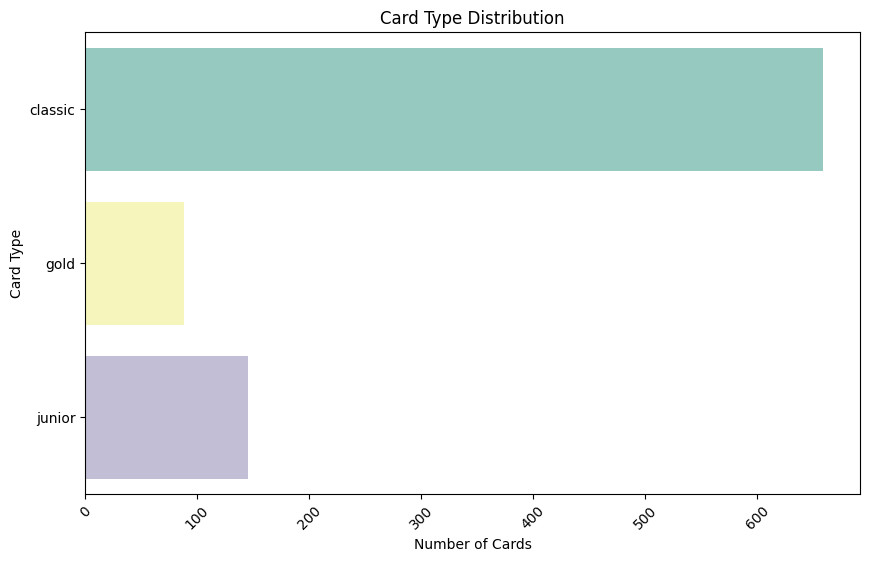

In [202]:

import matplotlib.pyplot as plt
import seaborn as sns

card_types = card_type_counts.index.to_list()
counts = card_type_counts.values.tolist()

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=card_types, palette="Set3")

plt.xlabel("Number of Cards")
plt.ylabel("Card Type")
plt.title("Card Type Distribution")

plt.xticks(rotation=45)

plt.show()


In [156]:
#Date pattern changed

card['issued'] = pd.to_datetime(card['issued']).dt.strftime('%y-%m-%d')
card['issued'].head()


<ipython-input-156-212cee91dbaf>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  card['issued'] = pd.to_datetime(card['issued']).dt.strftime('%y-%m-%d')


0    93-11-07
1    94-01-19
2    94-02-05
3    94-02-08
4    94-02-15
Name: issued, dtype: object

In [161]:
# How the banks have performed over the years. Give their detailed analysis year-wise.


card['year'] = pd.to_datetime(card['issued']).dt.strftime('%Y')

card_count_by_year = card.groupby('year')['card_id'].count()

print(card_count_by_year)


year
1993      1
1994     21
1995     63
1996    116
1997    242
1998    449
Name: card_id, dtype: int64


<ipython-input-161-a7d6410000a3>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  card['year'] = pd.to_datetime(card['issued']).dt.strftime('%Y')


In [162]:
# How the banks have performed over the years. Give their detailed analysis month-wise.

card['month'] = pd.to_datetime(card['issued']).dt.strftime('%m')
card_count_by_month = card.groupby('month')['card_id'].count()
print(card_count_by_month)


month
01    64
02    47
03    49
04    54
05    68
06    74
07    82
08    79
09    90
10    93
11    95
12    97
Name: card_id, dtype: int64


<ipython-input-162-1d0ed925c397>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  card['month'] = pd.to_datetime(card['issued']).dt.strftime('%m')


In [167]:
# What is the bank’s loan portfolio and how does it vary across different purposes and client segments?

loan_status_counts = loan.groupby('status')['loan_id'].count()

print(loan_status_counts)


status
A    203
B     31
C    403
D     45
Name: loan_id, dtype: int64


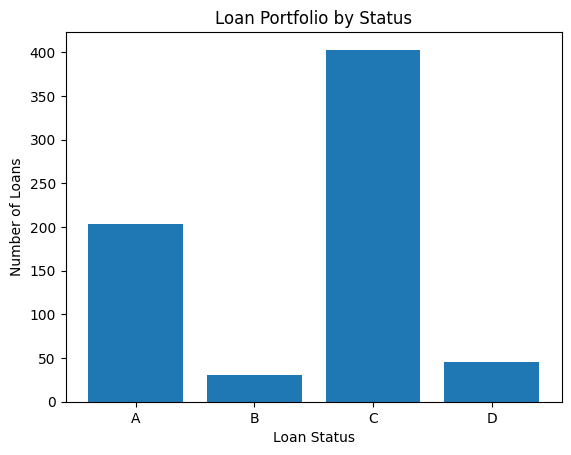

In [200]:

import matplotlib.pyplot as plt

loan_status_counts = loan.groupby('status')['loan_id'].count()

plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.title('Loan Portfolio by Status')
plt.show()


In [175]:
# Can the bank introduce new financial products or services to attract more customers and increase profitability?

Yes, the bank can introduce new financial products or services to attract more customers
and increase profitability by catering to evolving customer needs
and market demands.


Důchod - Pension or Income
Pojistné - Insurance
Sankční úrok - Penalty Interest
SIPO - Combined Household Payments (System for Consolidated Payments in the Czech Republic, covering utilities, TV license, etc.)
Služby - Services
Úrok - Interest
Úvěr - Loan


In [211]:
# How can the bank improve its customer service and satisfaction levels?


unique_k_symbols = order['k_symbol'].unique()

account_count_by_k_symbol = order.groupby('k_symbol')['account_id'].count()

account_count_by_k_symbol = account_count_by_k_symbol[account_count_by_k_symbol.index != '']

print(unique_k_symbols)
print(account_count_by_k_symbol)


['SIPO' 'UVER' ' ' 'POJISTNE' 'LEASING']
k_symbol
            1379
LEASING      341
POJISTNE     532
SIPO        3502
UVER         717
Name: account_id, dtype: int64


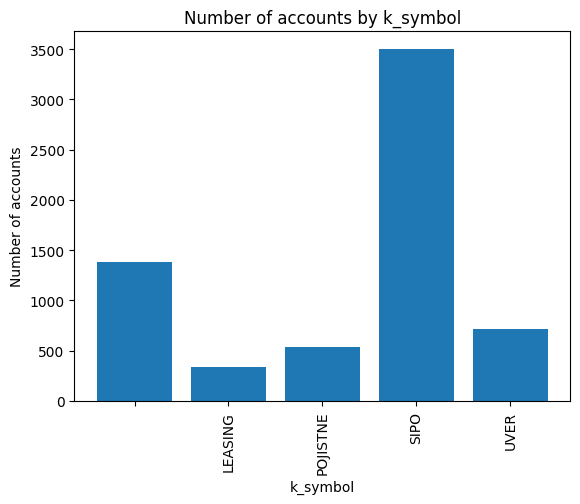

In [212]:

import matplotlib.pyplot as plt

plt.bar(account_count_by_k_symbol.index, account_count_by_k_symbol.values)
plt.xlabel("k_symbol")
plt.ylabel("Number of accounts")
plt.title("Number of accounts by k_symbol")
plt.xticks(rotation=90)
plt.show()
